In [1]:
import json

import aemeasure
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load experiment data

In [2]:
experiment_table = aemeasure.read_as_pandas_table("results/be_smart_30it_60sec")
experiment_table["force_free_edges_size"] = experiment_table[
    "increase_added_edges_per_iter"
]
del experiment_table["increase_added_edges_per_iter"]
experiment_table

,instance,time_limit,iterations,cds_iter_stop,cds_optimize_stop,cds_found_solution_size,cds_proven_optimal,cds_grb_status,cds_global_lb,cds_nbhd_free_size,...,runtime,stdout,stderr,timestamp,hostname,argv,git_revision,python_env,cwd,force_free_edges_size
0,soletta-case-study-2017-03-09_21-02-40,60.0,30,"[1677870625448, 1677870655445, 1677870691403, ...","[1677870625448, 1677870655445, 1677870691403, ...","[11, 14, 19, 21, 21, 21, 23, 23, 24, 24, 24, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, ...","[11, 14, 19, 21, 21, 21, 23, 23, 24, 24, 24, 2...","[1000, 1100, 1210, 1210, 1331, 1464, 1464, 161...",...,1021.572391,,,2023-03-03T20:26:38.575012,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,2635e563f2dc51af40a2472a01b1d34352a659c5,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,True
1,toybox-case-study-2020-12-06_00-02-46,60.0,30,"[1677870343815, 1677870403008, 1677870431950, ...","[1677870343815, 1677870403008, 1677870431950, ...","[5, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, ...","[5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[493, 1210, 1089, 795, 1316, 795, 794, 795, 79...",...,941.383078,,,2023-03-03T20:21:22.496718,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,2635e563f2dc51af40a2472a01b1d34352a659c5,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,True
2,soletta-case-study-2017-03-09_21-02-40,60.0,30,"[1677869708631, 1677869713265, 1677869717897, ...","[1677869708631, 1677869713265, 1677869717897, ...","[6, 11, 16, 20, 27, 29, 31, 33, 33, 34, 34, 34...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, ...","[6, 11, 16, 20, 27, 29, 31, 33, 33, 34, 34, 34...","[17, 793, 765, 66, 919, 1506, 1506, 1642, 2253...",...,878.766631,,,2023-03-03T20:09:35.791222,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,2635e563f2dc51af40a2472a01b1d34352a659c5,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,False
3,soletta-case-study-2016-04-25_12-06-04,60.0,30,"[1677869717081, 1677869717095, 1677869717129, ...","[1677869717081, 1677869717095, 1677869717129, ...","[12, 12, 12, 13, 13, 16, 16, 16, 21, 21, 17, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, ...","[12, 12, 12, 13, 13, 16, 16, 16, 21, 21, 21, 2...","[529, 10, 237, 110, 191, 104, 340, 1014, 2250,...",...,589.467101,,,2023-03-03T20:04:46.182755,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,2635e563f2dc51af40a2472a01b1d34352a659c5,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,False
4,fiasco-case-study-2019-12-17_12-09-20,60.0,30,"[1677871415659, 1677871417612, 1677871418312, ...","[1677871415659, 1677871417612, 1677871418312, ...","[93, 97, 104, 119, 125, 139, 142, 156, 162, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[93, 97, 104, 119, 125, 139, 142, 156, 162, 16...","[924, 1067, 1094, 1457, 1197, 1526, 1717, 2088...",...,547.539819,,,2023-03-03T20:32:41.063351,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,2635e563f2dc51af40a2472a01b1d34352a659c5,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,False
5,fiasco-case-study-2017-09-26_11-30-56,60.0,30,"[1677869698588, 1677869699757, 1677869700630, ...","[1677869698588, 1677869699757, 1677869700630, ...","[97, 112, 125, 139, 149, 164, 173, 184, 191, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[97, 112, 125, 139, 149, 164, 173, 184, 191, 1...","[597, 1156, 1326, 1395, 1557, 1635, 1492, 2061...",...,382.467554,,

In [3]:
# Load reference data

best_ubs = {}

with open("lower_bounds_candp.json") as f:
    best_ubs = json.load(f)

best_ubs

{'busybox-case_study-2010-04-18_22-09-30': 21,
 'uclibc-case-study-2010-09-15_12-31-22': 512,
 'busybox-case_study-2010-01-20_02-47-37': 21,
 'busybox-case_study-2008-07-19_09-27-19': 27,
 'soletta-case-study-2016-06-02_14-58-43': 37,
 'soletta-case-study-2015-07-06_15-16-16': 16,
 'busybox-case_study-2008-05-27_08-41-32': 24,
 'busybox-case_study-2008-11-22_18-41-41': 24,
 'uclibc-case-study-2008-10-27_22-02-54': 512,
 'toybox-case-study-2007-11-27_00-57-42': 8,
 'uclibc-case-study-2016-11-27_22-32-11': 310,
 'busybox-case_study-2009-12-07_01-37-34': 21,
 'busybox-case_study-2008-04-22_00-16-29': 24,
 'busybox-case_study-2009-06-18_19-59-51': 24,
 'soletta-case-study-2015-09-02_17-37-27': 30,
 'soletta-case-study-2015-12-28_13-48-28': 30,
 'busybox-case_study-2008-08-22_08-25-26': 27,
 'uclibc-case-study-2016-12-23_07-53-31': 310,
 'soletta-case-study-2016-01-29_14-02-27': 30,
 'busybox-case_study-2008-01-05_03-26-41': 25,
 'busybox-case_study-2008-11-07_01-12-16': 24,
 'soletta-case-

# Create and export Plots

In [4]:
sns.set_theme()

In [5]:
datapoints = []

for instance in experiment_table["instance"].unique():
    rows = experiment_table[experiment_table["instance"] == instance]

    for _index, row in rows.iterrows():
        if len(row["cds_global_lb"]) == 0:
            print("Warning: Entry with empty lists skipped")
            continue

        i = 1
        for (
            global_lb,
            _lb,
            _iter_start,
            _iter_stop,
            _nbhd_start,
            _nbhd_stop,
            _nbhd_size,
        ) in zip(
            row["cds_global_lb"],
            row["cds_found_solution_size"],
            row["cds_iter_start"],
            row["cds_iter_stop"],
            row["cds_nbhd_start"],
            row["cds_nbhd_stop"],
            row["cds_nbhd_free_size"],
        ):
            d = {}
            d["instance"] = instance
            # d["instance"] = instance.split("-")[0]
            d["iteration"] = i
            d["time in seconds"] = (
                sum(
                    row["cds_iter_stop"][j] - row["cds_iter_start"][j]
                    for j in range(0, i)
                )
                / 1000.0
            )
            d["force number of free edges"] = row["force_free_edges_size"]
            # d["global cds size"] = global_lb
            d["cds score (%)"] = 100.0 * (global_lb / best_ubs[instance])
            # d["cds size"] = lb
            # d["nbhd_time"] = (nbhd_stop - nbhd_start) / 1000.0
            # d["ip_time"] = (iter_stop - iter_start) / 1000.0 - d["nbhd_time"]
            # d["free edges"] = nbhd_size
            datapoints.append(d)
            i += 1

In [6]:
data = pd.DataFrame(data=datapoints)
data

,instance,iteration,time in seconds,force number of free edges,cds score
0,soletta-case-study-2017-03-09_21-02-40,1,12.590,True,29.729730
1,soletta-case-study-2017-03-09_21-02-40,2,42.587,True,37.837838
2,soletta-case-study-2017-03-09_21-02-40,3,78.545,True,51.351351
3,soletta-case-study-2017-03-09_21-02-40,4,88.341,True,56.756757
4,soletta-case-study-2017-03-09_21-02-40,5,110.706,True,56.756757
...,...,...,...,...,...
807,busybox-case_study-2009-09-20_04-28-22,25,684.570,False,80.952381
808,busybox-case_study-2009-09-20_04-28-22,26,729.148,False,80.952381
809,busybox-case_study-2009-09-20_04-28-22,27,775.311,False,80.952381
810,busybox-case_study-2009-09-20_04-28-22,28,814.272,False,80.952381


{'toybox', 'fiasco', 'busybox', 'soletta', 'uclibc'}
0 busybox
1 fiasco
2 soletta
3 toybox
4 uclibc


<Figure size 640x480 with 0 Axes>

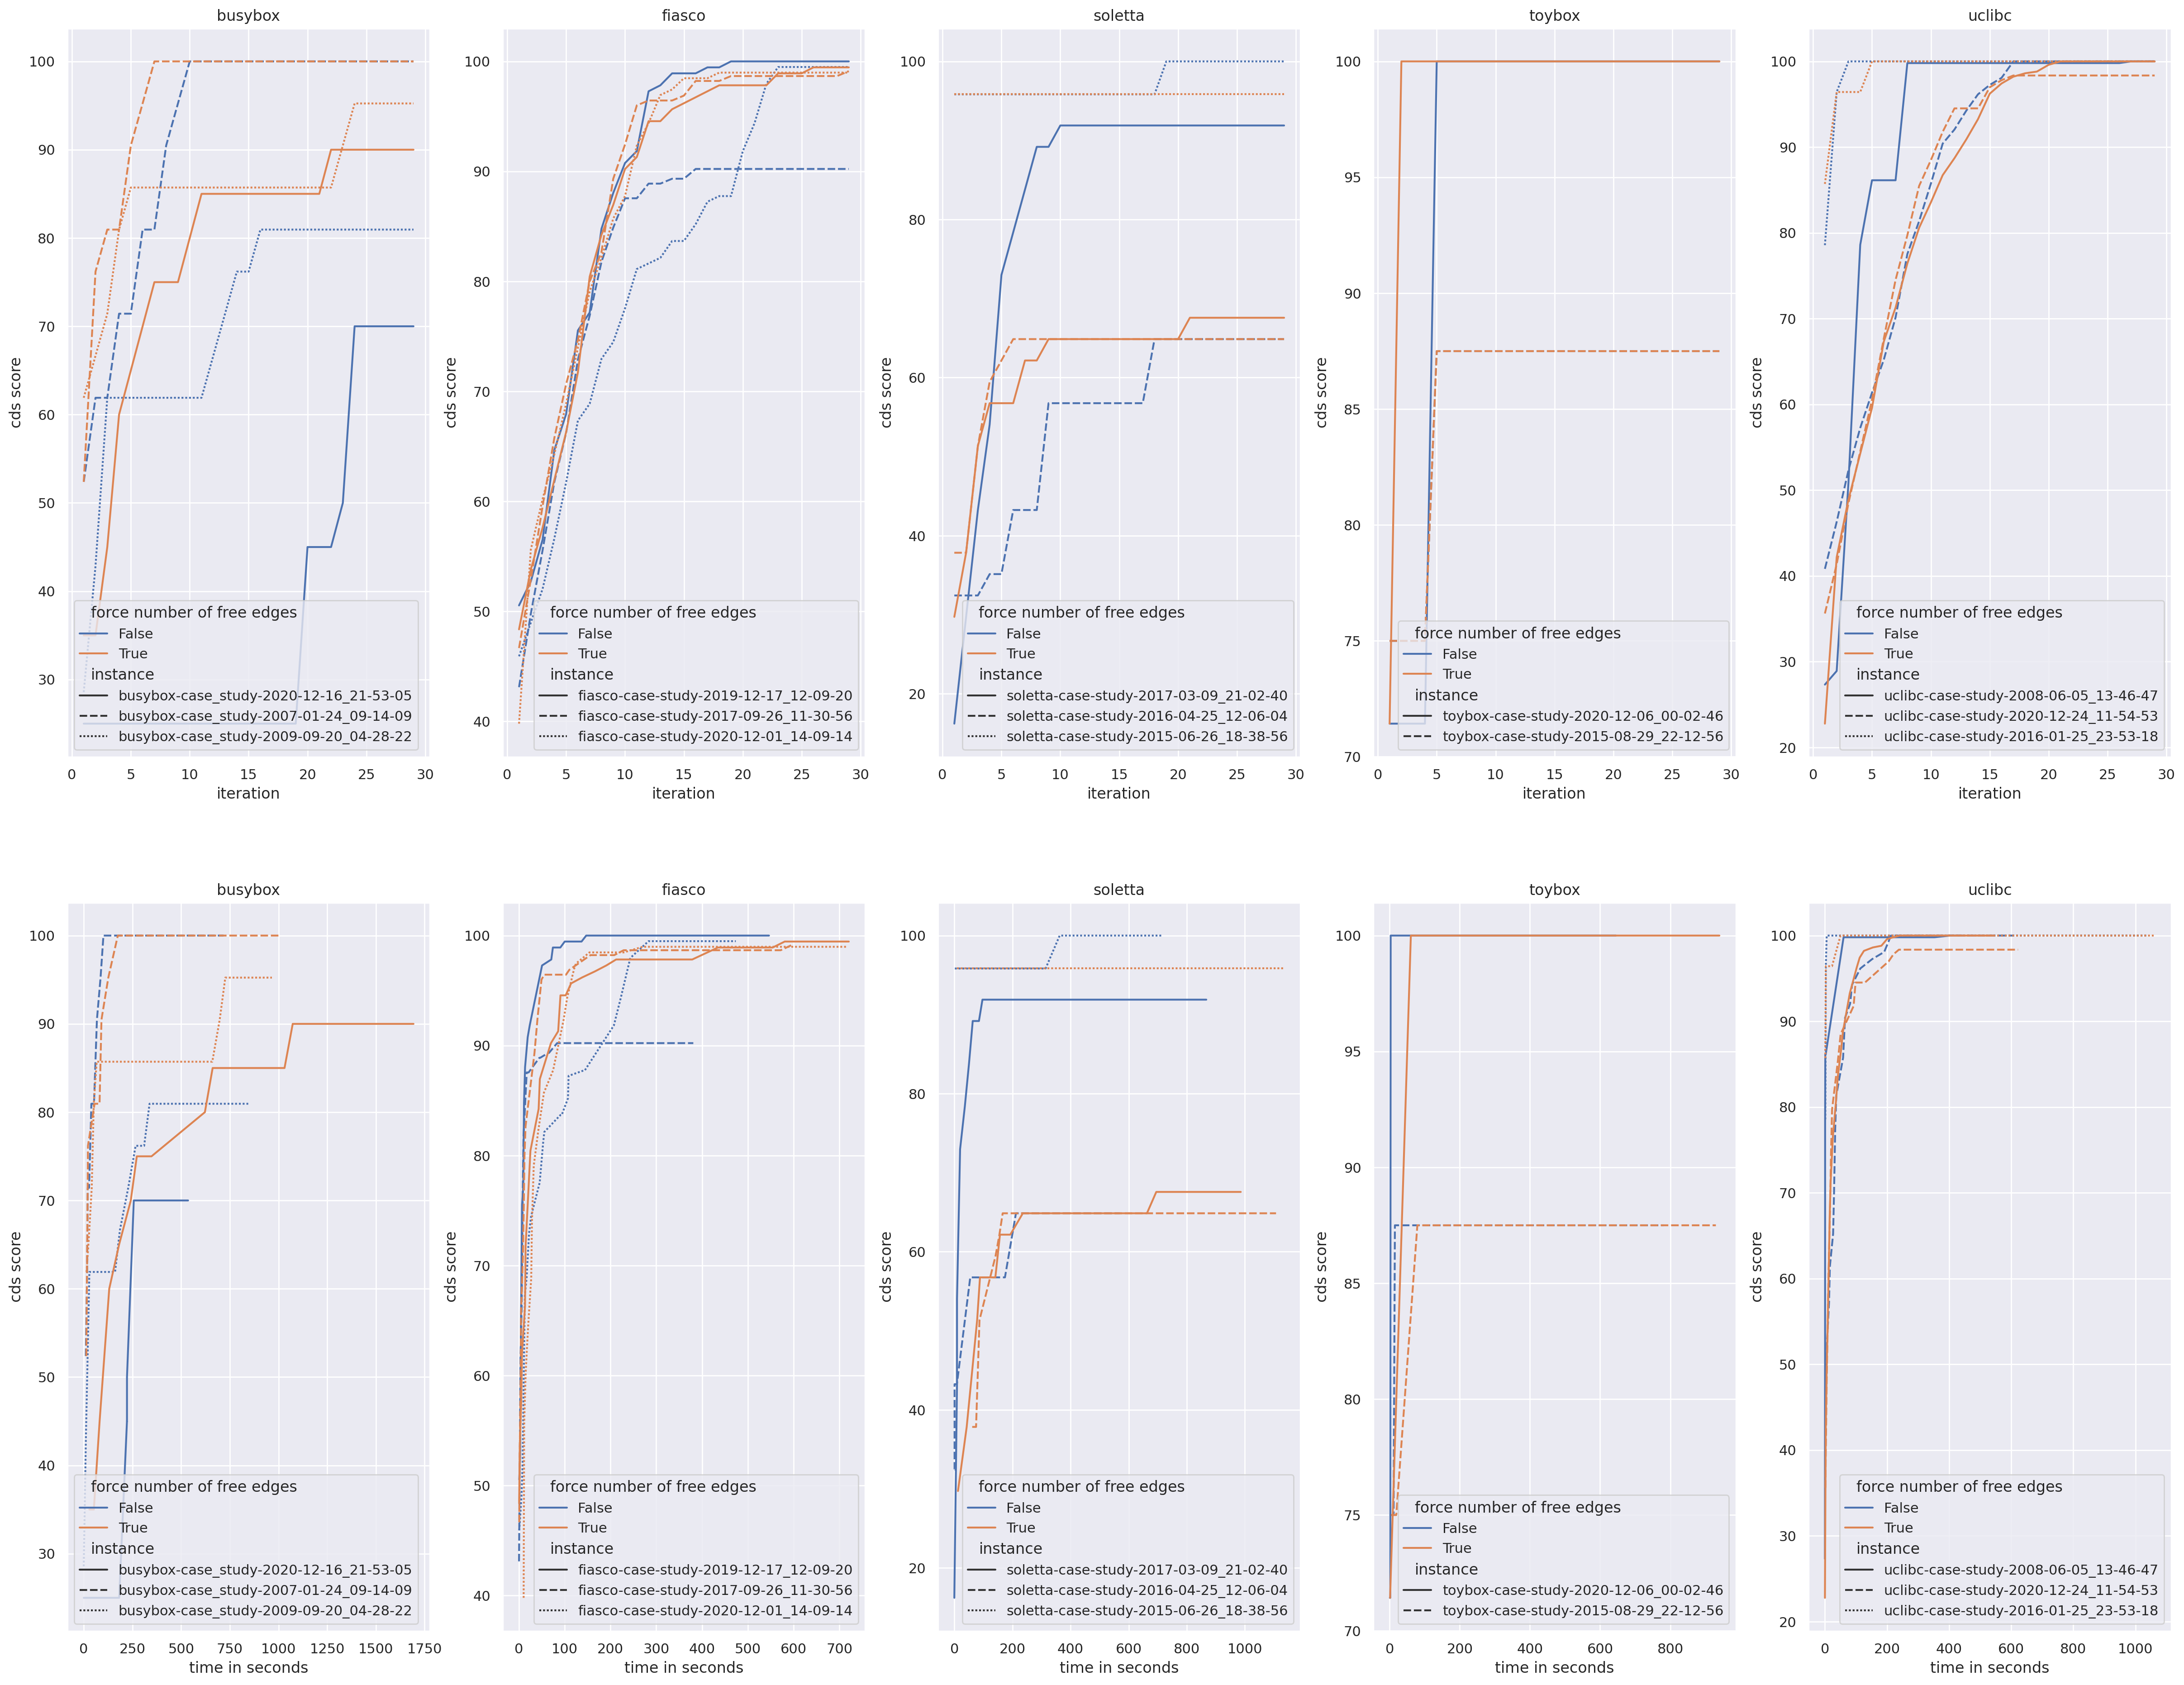

In [11]:
instances = set(data["instance"].map(lambda s: s.split("-")[0]).unique())
print(instances)

plt.cla()
plt.clf()
fig, ax = plt.subplots(2, len(instances))
fig.set_dpi(200)
fig.set_size_inches(len(instances) * 6, 23)

for i, instance in enumerate(sorted(instances)):
    print(i, instance)
    subdata = data[data["instance"].map(lambda s: s.startswith(instance))]
    sns.lineplot(
        data=subdata,
        ax=ax[0][i],
        x="iteration",
        y="cds score",
        hue="force number of free edges",
        style="instance",
    ).set_title(instance)
    sns.lineplot(
        data=subdata,
        ax=ax[1][i],
        x="time in seconds",
        y="cds score",
        hue="force number of free edges",
        style="instance",
    ).set_title(instance)

plt.savefig(f"{instance}_comparison.pdf", bbox_inches="tight")

In [8]:
# molten_data = dict()

# for instance, data in datapoints.items():
#     df_o = pd.DataFrame(data)
#     molten_data[instance] = df_o.melt(["instance", "iteration", "force number of free edges"], var_name="variable", value_name="cds score")

In [9]:
# plt.cla()
# plt.clf()

# for instance, df in molten_data.items():
#     plt.cla()
#     plt.clf()
#     fig, ax = plt.subplots(2,1)
#     fig.set_dpi(200)
#     fig.set_size_inches(12, 10)

#     seaborn.lineplot(data=df, ax = ax[0], x="iteration", y="number of edges", style="variable", style_order=["global cds size", "cds size", "free edges"], hue="adaptive sequential fixing").set_title(instance)
#     seaborn.lineplot(data=df, ax = ax[1], x="iteration", y="number of edges", style="variable", style_order=["nbhd_time", "ip_time"], hue="adaptive sequential fixing")
#     plt.ylabel("time in seconds")
#     plt.savefig(f"{instance}_comparison.pdf", bbox_inches='tight')
#     print(instance)

In [10]:
# import zipfile

# INSTANCE_ZIP_PATH = "/home/gabriel/git/software-configuration-problem-cpp/instances/exported_instances.zip"
# def get_instance_archive() -> zipfile.ZipFile:
#     return zipfile.ZipFile(INSTANCE_ZIP_PATH, "r")


# def get_instance_names():
#     with get_instance_archive() as archive:
#         return [f.filename.split("/")[0] for f in archive.filelist if f.is_dir()]

# instances = get_instance_names()

# num_vertices = defaultdict(list)
# num_edges = defaultdict(list)
# with get_instance_archive() as archive:
#     for instance in instances:
#         n_concrete = int(
#             json.loads(archive.read(f"{instance}/index_instance.json"))["n_concrete"]
#         )
#         num_vertices[instance[:4]].append(n_concrete * 2)
#         conflicts = json.loads(archive.read(f"{instance}/conflicts.json"))["conflicts"]
#         num_edges[instance[:4]].append((n_concrete * 2)**2 - len(conflicts))
#         # # initial_sol = json.loads(archive.read(f"{instance}/initial.json"))["initial_mutually_exclusive_set"]
#         # assert type(conflicts) == list
#         # assert len(conflicts) > 0
#         # assert type(initial_sol) == list
#         # # assert len(initial_sol) > 0
#         # assert n_concrete > 0

# for key in num_vertices.keys():
#     l1 = num_vertices[key]
#     l2 = num_edges[key]

#     print(f"{key}: #nodes: min = {min(l1)}, max = {max(l1)}, avg = {sum(l1) / len(l1)}")
#     print(f"{key}: #edges: min = {min(l2)}, max = {max(l2)}, avg = {sum(l2) / len(l2)}")